In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
import requests
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', None)

In [2]:
m = pd.read_csv('./ph_fires_matched_2.1.csv')

In [3]:
m['unconfined_damaging'] = m[[f'inc_type_111_{x}' for x in range(2012, 2022)]].sum(axis=1) + m[[f'cont_loss_{x}' for x in range(2012, 2022)]].sum(axis=1) + m[[f'prop_loss_{x}' for x in range(2012, 2022)]].sum(axis=1) + m[[f'oth_inj_{x}' for x in range(2012, 2022)]].sum(axis=1) + m[[f'oth_death_{x}' for x in range(2012, 2022)]].sum(axis=1)
m['total_indoor'] = m[[f'building_fires_{x}' for x in range(2012, 2022)]].sum(axis=1)
m['total_111'] = m[[f'inc_type_111_{x}' for x in range(2012, 2022)]].sum(axis=1)
m['total_money_lost'] = m[[f'prop_loss_{x}' for x in range(2012, 2022)]].sum(axis=1) + m[[f'cont_loss_{x}' for x in range(2012, 2022)]].sum(axis=1)
m['total_deaths_plus_injuries'] = m[[f'oth_inj_{x}' for x in range(2012, 2022)]].sum(axis=1) + m[[f'oth_death_{x}' for x in range(2012, 2022)]].sum(axis=1)

In [4]:
m[(m.building_type_code_es == 1) & 
  (m.unconfined_damaging > 0)].shape[0]

646

In [5]:
m[(m.building_type_code_es == 1) & 
  (m.unconfined_damaging > 0)].total_units.mean()

115.26625386996903

In [6]:
m[(m.building_type_code_es == 1) & 
  (m.total_indoor > 0)].total_units.mean()

103.05026611472502

In [ ]:
m[(m.building_type_code_es == 1)].total_units.mean()

89.23750310867943

In [13]:
for year in range(2012, 2022):
    m['money_lost_' + str(year)] = m[f'prop_loss_{year}'] + m[f'cont_loss_{year}'] 

In [17]:
m[[x for x in m.columns if 'money_lost_' in x]].sum().mean()

4150524.1

In [22]:
m[[x for x in m.columns if 'oth_death_' in x]].sum()

oth_death_2012    1.0
oth_death_2013    1.0
oth_death_2014    0.0
oth_death_2015    1.0
oth_death_2016    0.0
oth_death_2017    1.0
oth_death_2018    2.0
oth_death_2019    1.0
oth_death_2020    2.0
oth_death_2021    1.0
dtype: float64

In [8]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation_coefficient = m['total_indoor'].corr(m['total_111'])

# Calculate the correlation coefficient and p-value using scipy
corr_coefficient, p_value = pearsonr(m['total_indoor'], m['total_111'])

print("Correlation Coefficient:", corr_coefficient)
print("P-Value:", p_value)


Correlation Coefficient: 0.3003544736202646
P-Value: 0.0


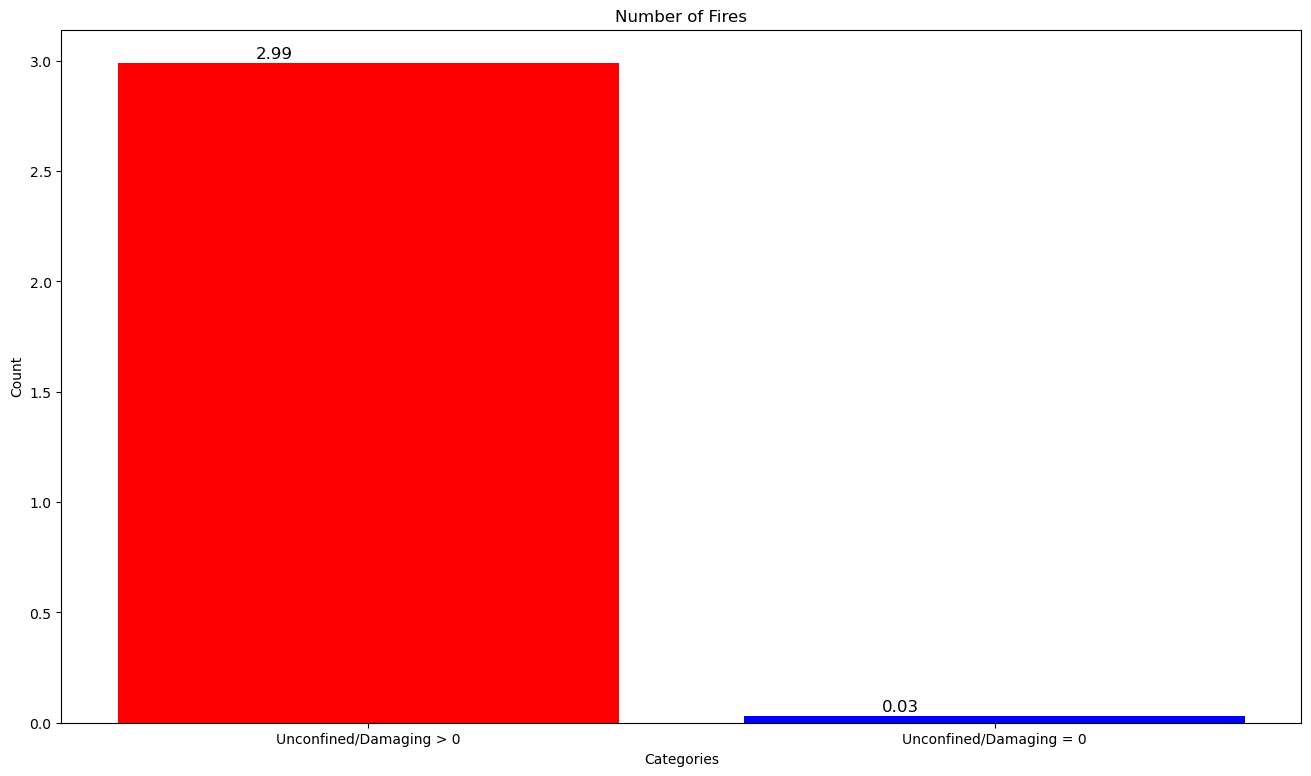

In [9]:
unconfined_fires_gt_0 = m[m['unconfined_damaging'] > 0]['total_indoor'].mean()
unconfined_fires_eq_0 = m[m['unconfined_damaging'] == 0]['total_indoor'].mean()

# Values for the bars
values = [unconfined_fires_gt_0, unconfined_fires_eq_0]

# Labels for the bars
labels = ['Unconfined/Damaging > 0', 'Unconfined/Damaging = 0']

plt.figure(figsize=(16, 9))
bars = plt.bar(labels, values, color=['red', 'blue'])
plt.title('Number of Fires')
plt.ylabel('Count')
plt.xlabel('Categories')

# Adding the mean values to the top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15,
             bar.get_height() + 0.02,
             f'{value:.2f}',
             ha='center',
             color='black',
             fontsize=12)

plt.show()
